Dredging Tutorial 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:,}'.format# show , for thousands
pd.set_option('display.max_columns', 1000)# show all columns

from pathlib import Path

# change the width of the cells on screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

,Hs [m]
time,
2012-01-01 00:00:00,1.49262272910131
2012-01-01 01:00:00,1.5640411142480894
2012-01-01 02:00:00,1.609562005568361
2012-01-01 03:00:00,1.636151963909651
2012-01-01 04:00:00,1.6389448705755278


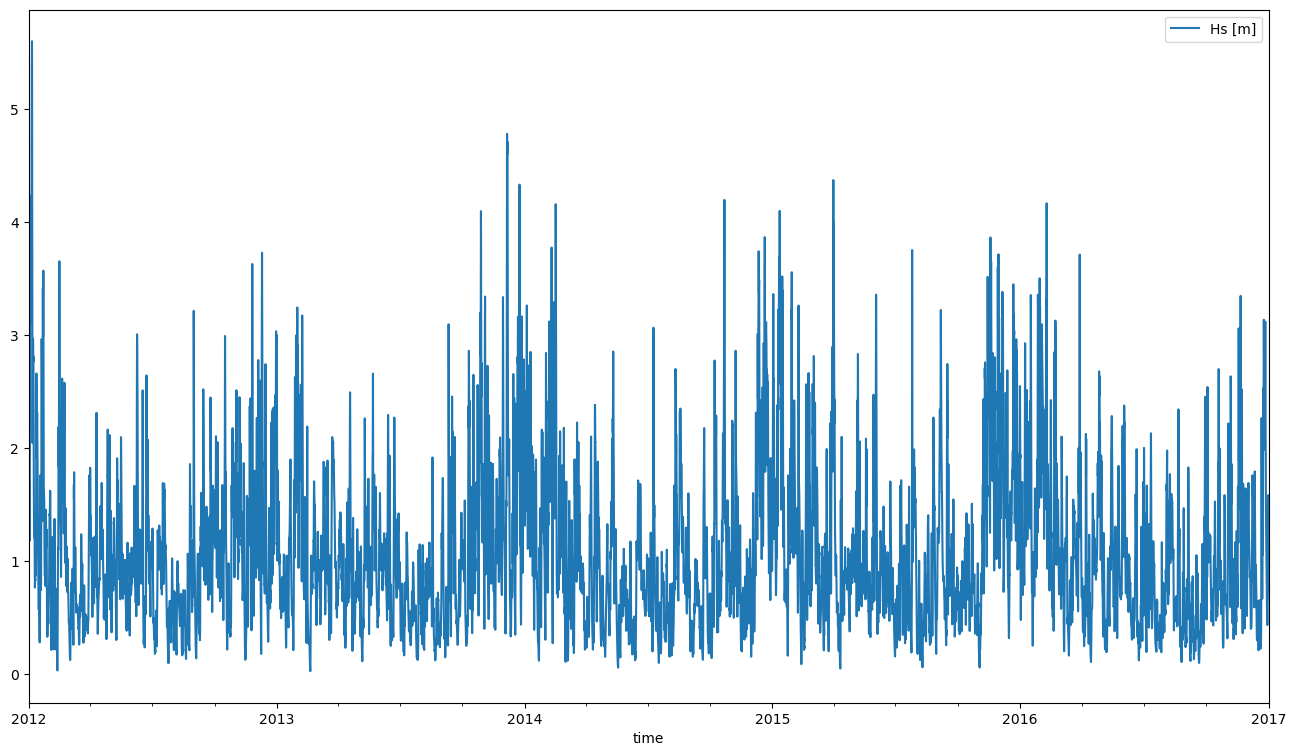

In [4]:
path = Path.cwd()
eurpfm = pd.read_csv(Path.joinpath(path, "Waves_Safe_Haven.csv"), delimiter = ',')
eurpfm['time'] = pd.to_datetime(eurpfm['time'], format='%Y-%m-%d %H:%M:%S')
eurpfm.set_index(['time'], inplace = True)

display(eurpfm.head(5))
eurpfm.plot(figsize=(16,9),subplots=True);

Mean and Standard Deviation

In [5]:
mean_overal = eurpfm.mean()
print('Mean')
print(mean_overal, "\n", )

print('Standard deviation')
std_overal = eurpfm.std()
print(std_overal)

Mean
Hs [m]   1.061542415648853
dtype: float64 

Standard deviation
Hs [m]   0.687480264420601
dtype: float64


Monthly mean and Standard deviation

C:\Users\denis\AppData\Local\Temp\ipykernel_31184\587726002.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_monthly = eurpfm.resample('M').mean()
C:\Users\denis\AppData\Local\Temp\ipykernel_31184\587726002.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stddev_monthly = eurpfm.resample('M').std()


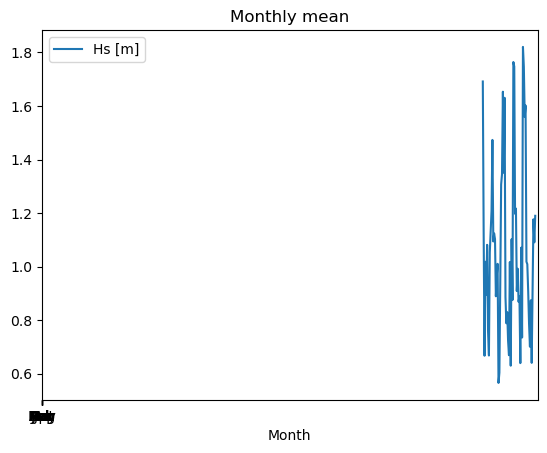

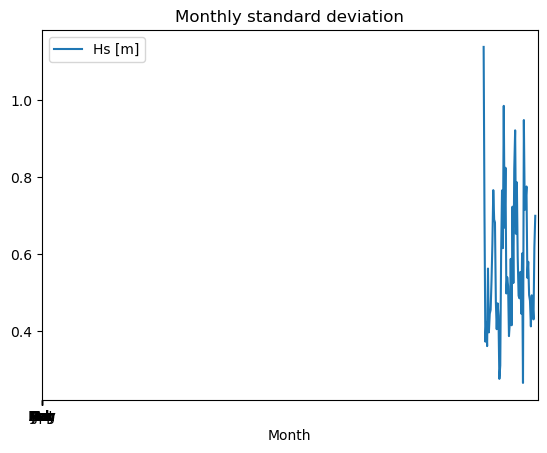

In [7]:
mean_monthly = eurpfm.resample('M').mean()
stddev_monthly = eurpfm.resample('M').std()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']   

plt.figure()
plt.title('Monthly mean')
plt.plot(mean_monthly, label = 'Hs [m]')
plt.legend(loc = 'best')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')

plt.figure()
plt.title('Monthly standard deviation')
plt.plot(stddev_monthly, label = 'Hs [m]')
plt.legend(loc = 'best')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month');